# Image Preprocessor Documentation
Note: The documentation is at the initial stage.
## Imports

In [ ]:
import source.load_raw_data.kaggle_dataset as kaggle_dataset
from source.utils.pcb_visualization import PCBVisualizerforTF
from source.image_preprocessing.image_preprocessor import ImagePreprocessor
import source.image_preprocessing.preprocessing_steps as steps

## Load Data

In [2]:
image_dataset = kaggle_dataset.load_tf_record()

## Process Images

In [3]:
preprocessor = ImagePreprocessor()

#TODO Build your own pipeline here:
pipeline = [
    steps.GaussianBlurFilter(kernel_size=(5,5), sigma=0.3),
    steps.AdaptiveHistogramEqualizer(clip_limit=2.0, tile_gridsize=(8,8)),
    steps.RGBToGrayscale(),
    steps.AdaptiveThresholder(block_size=15, c=-2),
    steps.DilateErodeSequencer(sequence='de'), 
    #steps. add a step here.
]
# Note resizing and normalization steps cast the image tensors to float16, therefore when plotted problems might occur!

preprocessor.set_pipe(pipeline)
processed_dataset = preprocessor.process(image_dataset)

## Visualization of Results

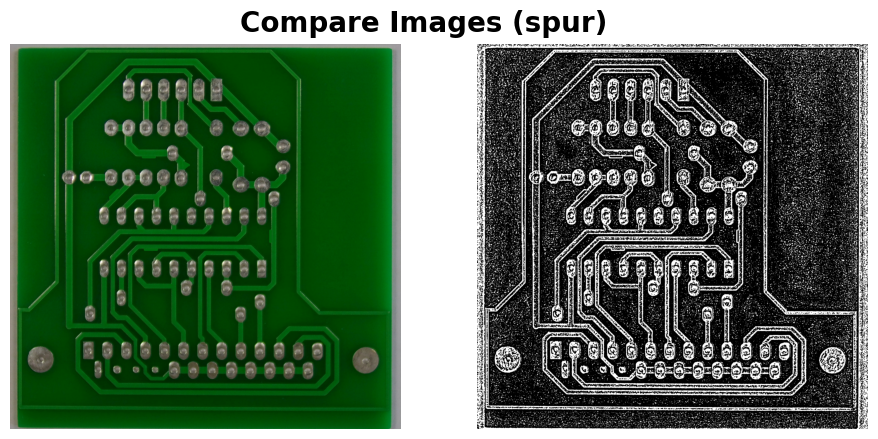

In [4]:
pcb_visualizer = PCBVisualizerforTF()
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 2)

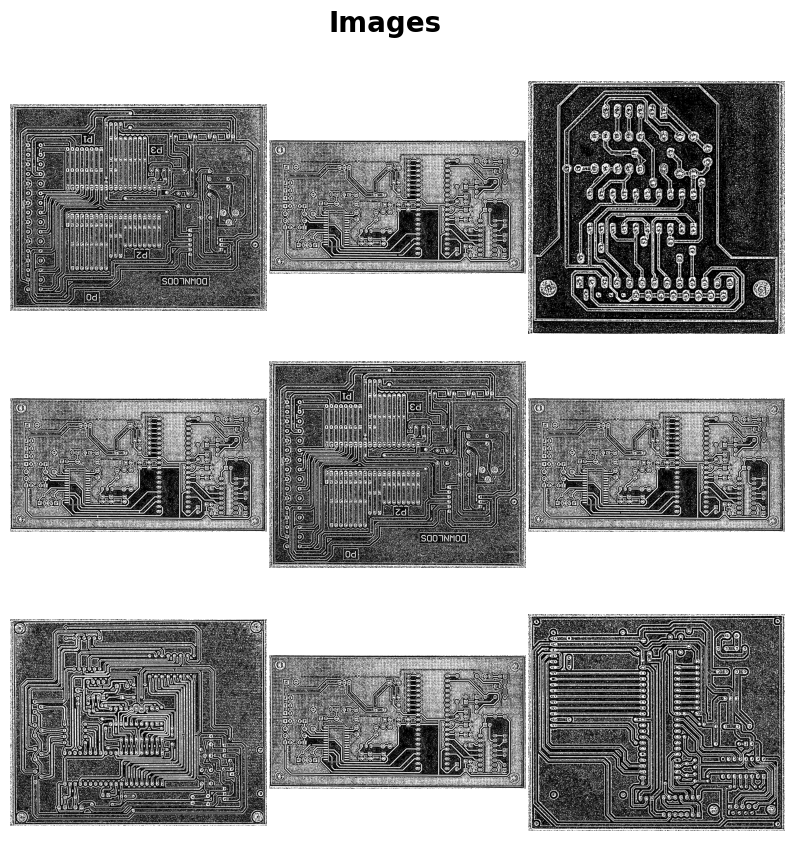

In [5]:
pcb_visualizer.plot_images(processed_dataset)

In [ ]:
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 3)